In [58]:
import   numpy                       as  np
import   pandas                      as  pd
import   matplotlib.pyplot           as  plt
import   seaborn                     as  sns
%matplotlib inline
import   scipy.stats                 as stats
import   statsmodels.formula.api     as sm
from     scipy.stats       import    zscore
from     statsmodels.api   import    add_constant
from     sklearn           import    metrics
from     sklearn.tree      import    DecisionTreeClassifier
from     sklearn           import    metrics,tree
from     sklearn.model_selection import train_test_split
from     IPython.display   import    Image
from     os                import    system
from     sklearn.model_selection import GridSearchCV
from     sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from     sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error
import warnings
import sklearn
import scipy
import json
import sys
import csv
import os

In [59]:
house_tt=pd.read_csv('train_HousePrice.csv')
r1=house_tt.shape
house_tt.head()
print(r1)
house_tt.head()

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
house_ts=pd.read_csv('test_HousePrice.csv')

#house_ts['SalePrice']=-999
r2=house_ts.shape

print(r2)
house_ts.head()

(1459, 80)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [5]:
train_id=house_tt['Id'].copy()
test_id=house_ts['Id'].copy()

In [6]:
house=pd.concat((house_tt.loc[:,'MSSubClass':'SaleCondition'],
                      house_ts.loc[:,'MSSubClass':'SaleCondition']))
house.shape

(2919, 79)

In [7]:
house.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [8]:
type(house_tt),type(house_ts)

(pandas.core.frame.DataFrame, pandas.core.frame.DataFrame)

In [9]:

house.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [10]:
house_tt.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

C:\Users\HII\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


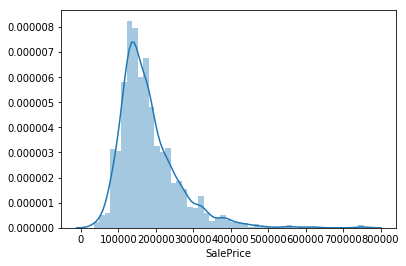

In [11]:
sns.distplot(house_tt.SalePrice)
plt.show()

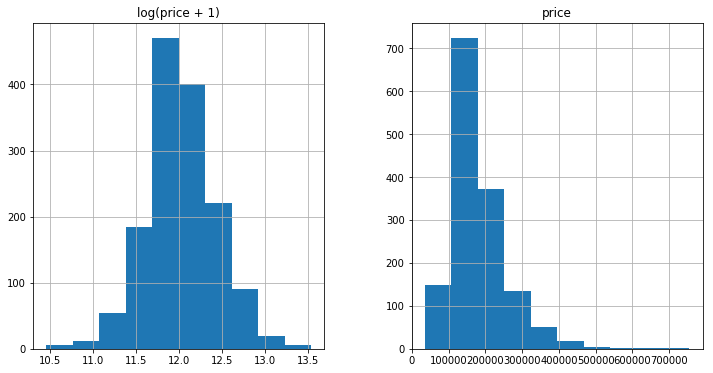

In [12]:
plt.rcParams['figure.figsize'] = (12.0, 6.0)
prices = pd.DataFrame({"price":house_tt["SalePrice"], "log(price + 1)":np.log1p(house_tt["SalePrice"])})
prices.hist()
plt.show()

# 6-1-3 Skewness vs Kurtosis
Skewness


It is the degree of distortion from the symmetrical bell curve or the normal distribution. It measures the lack of symmetry in data distribution. It differentiates extreme values in one versus the other tail. A symmetrical distribution will have a skewness of 0. 


Kurtosis

Kurtosis is all about the tails of the distribution — not the peakedness or flatness. It is used to describe the extreme values in one versus the other tail. It is actually the measure of outliers present in the distribution.

In [13]:
print("The Skewness of SalesPrice is ",house_tt.SalePrice.skew())
print("The Kurtosis of SalesPrice is ",house_tt.SalePrice.kurt())


The Skewness of SalesPrice is  1.8828757597682129
The Kurtosis of SalesPrice is  6.536281860064529


C:\Users\HII\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


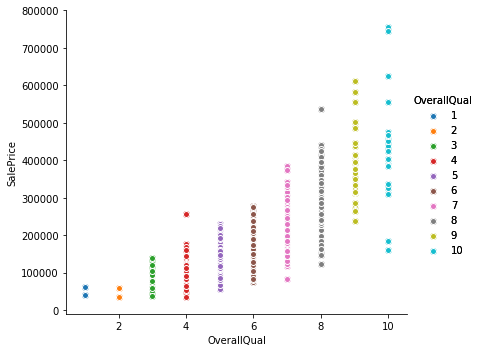

In [14]:
# Modify the graph above by assigning each species an individual color.
columns = ['SalePrice','OverallQual','TotalBsmtSF','GrLivArea','GarageArea','FullBath','YearBuilt','YearRemodAdd']
g=sns.FacetGrid(house_tt[columns], hue="OverallQual", size=5) \
   .map(plt.scatter, "OverallQual", "SalePrice") \
   .add_legend()
g=g.map(plt.scatter, "OverallQual", "SalePrice",edgecolor="w").add_legend();
plt.show()

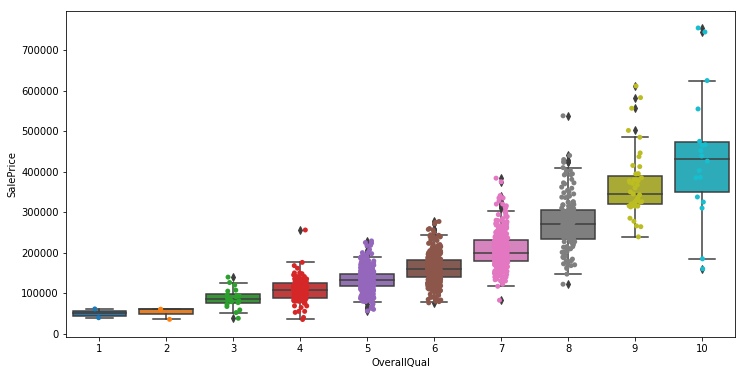

In [15]:
ax= sns.boxplot(x="OverallQual", y="SalePrice", data=house_tt[columns])
ax= sns.stripplot(x="OverallQual", y="SalePrice", data=house_tt[columns], jitter=True, edgecolor="gray")
plt.show()

<Figure size 864x432 with 0 Axes>

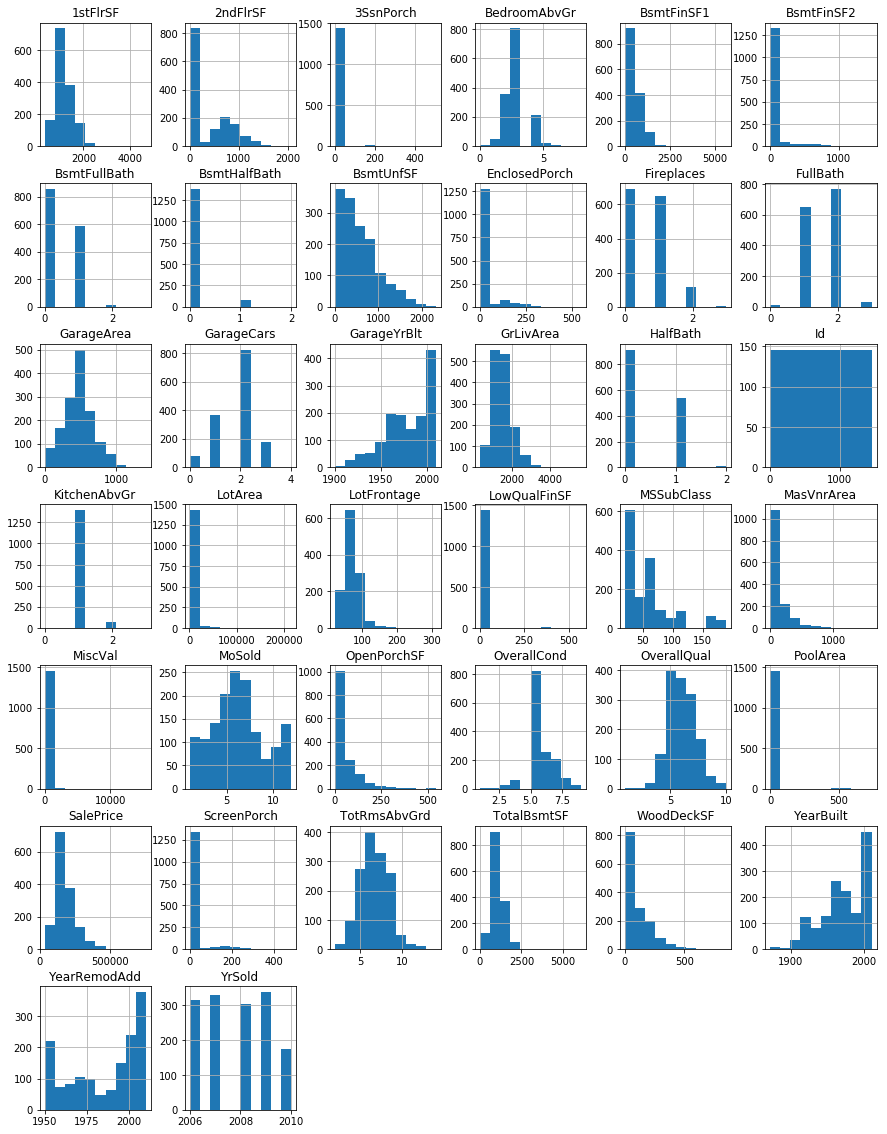

<Figure size 864x432 with 0 Axes>

In [16]:
# histograms of all individual paramters
house_tt.hist(figsize=(15,20))
plt.figure()

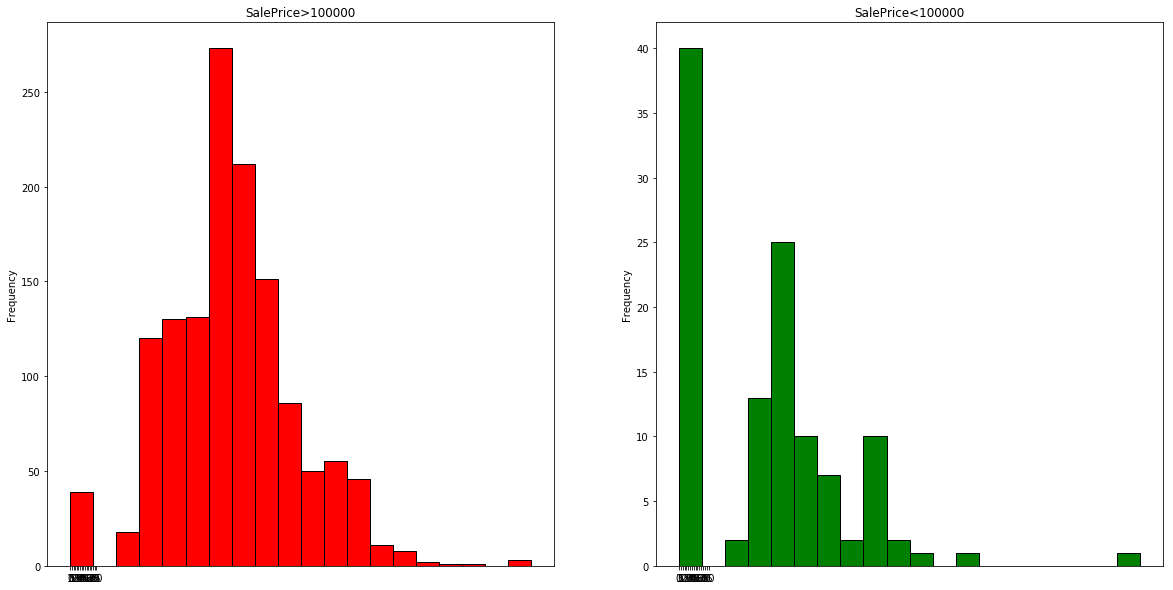

In [17]:
mini_train=house_tt[columns]
f,ax=plt.subplots(1,2,figsize=(20,10))
mini_train[mini_train['SalePrice']>100000].GarageArea.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='red')
ax[0].set_title('SalePrice>100000')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)
mini_train[mini_train['SalePrice']<100000].GarageArea.plot.hist(ax=ax[1],color='green',bins=20,edgecolor='black')
ax[1].set_title('SalePrice<100000')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)
plt.show()

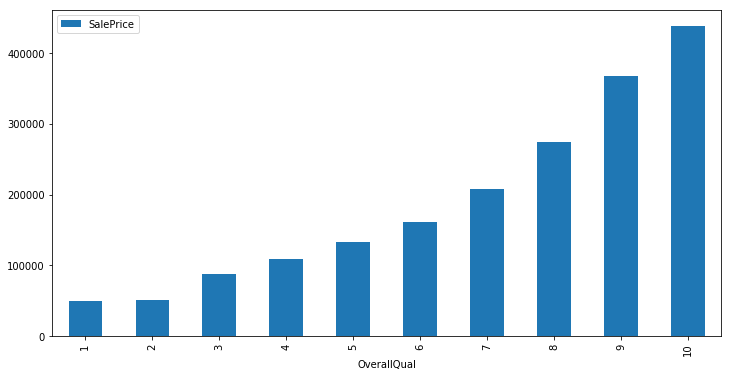

In [18]:
 
mini_train[['SalePrice','OverallQual']].groupby(['OverallQual']).mean().plot.bar()

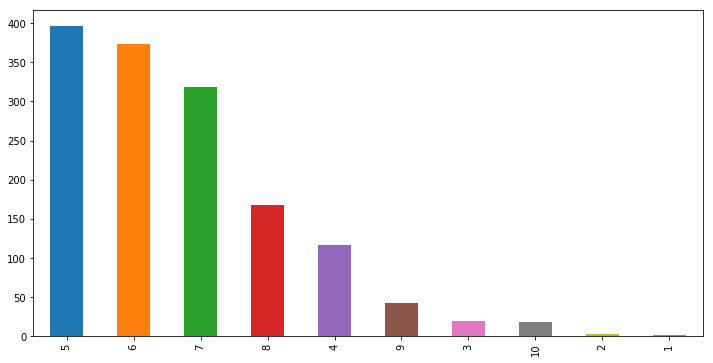

In [19]:
# number or overallqual in each section
house_tt['OverallQual'].value_counts().plot(kind="bar");

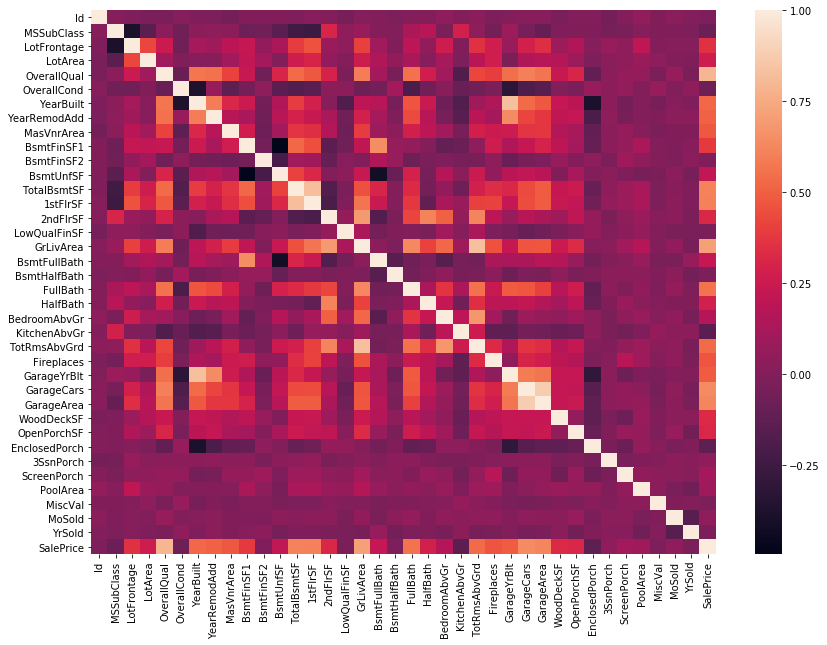

In [20]:
# Correlation Heatmap for all IDv's
plt.figure(figsize=[14,10])
sns.heatmap(house_tt.corr())
plt.show()

# top 10 Correlation features -saleprice correlation matrix

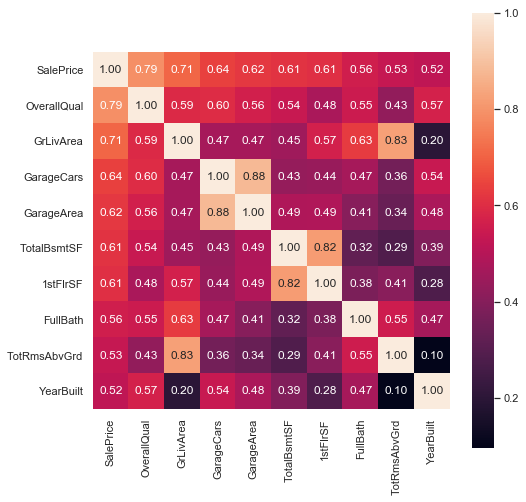

In [21]:

plt.figure(figsize=[8,8])
corrmat = house_tt.corr()
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(house_tt[cols].values.T)
sns.set(font_scale=1)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 12}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

<Figure size 864x432 with 0 Axes>

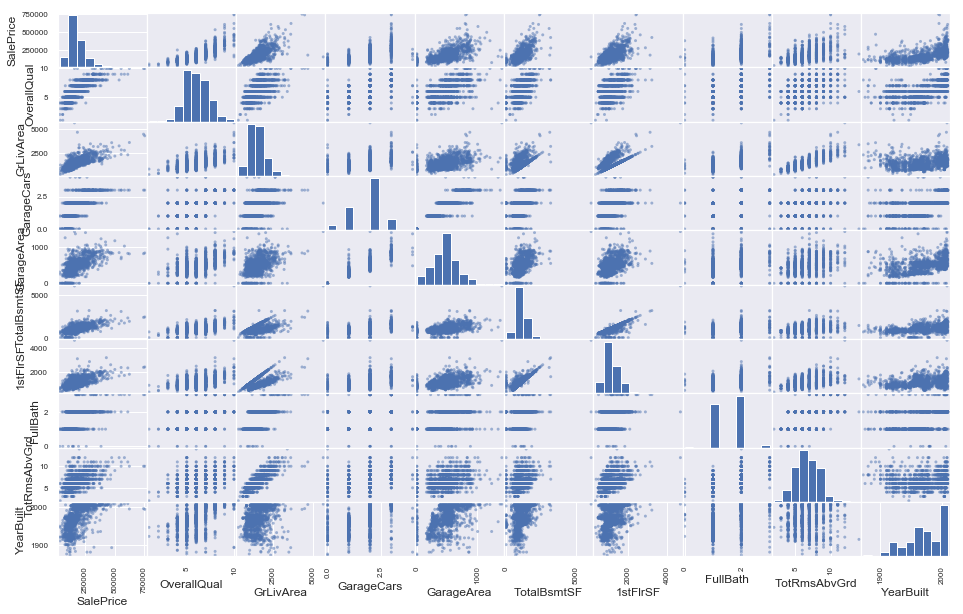

<Figure size 864x432 with 0 Axes>

In [22]:
# scatter plot matrix
pd.plotting.scatter_matrix(house_tt[cols],figsize=(16,10))
plt.figure()

C:\Users\HII\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\HII\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


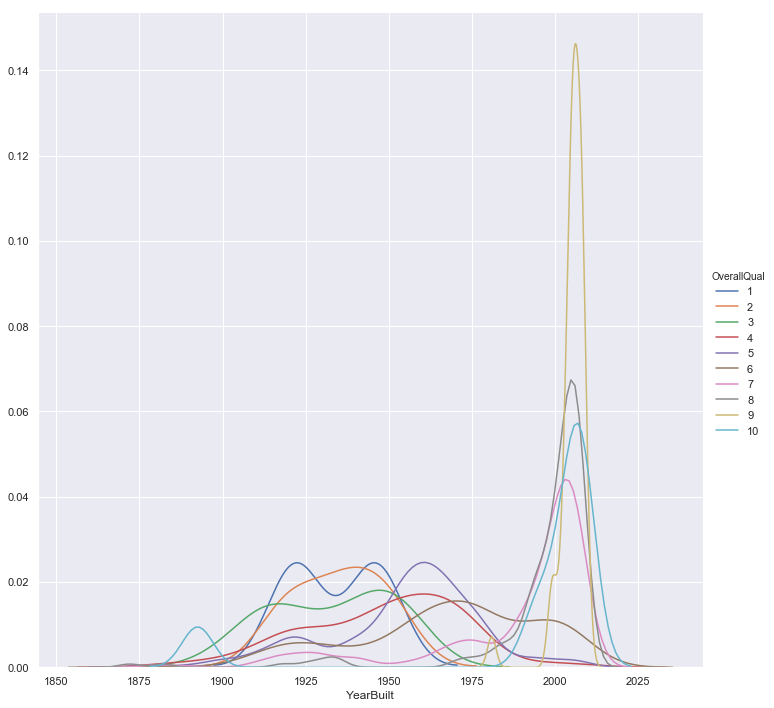

In [23]:
# seaborn's kdeplot, plots univariate or bivariate density estimates.
#Size can be changed by tweeking the value used
columns = ['SalePrice','OverallQual','TotalBsmtSF','GrLivArea','GarageArea','FullBath','YearBuilt','YearRemodAdd']
sns.FacetGrid(house_tt[cols], hue="OverallQual", size=10).map(sns.kdeplot, "YearBuilt").add_legend()
plt.show()

C:\Users\HII\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\HII\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


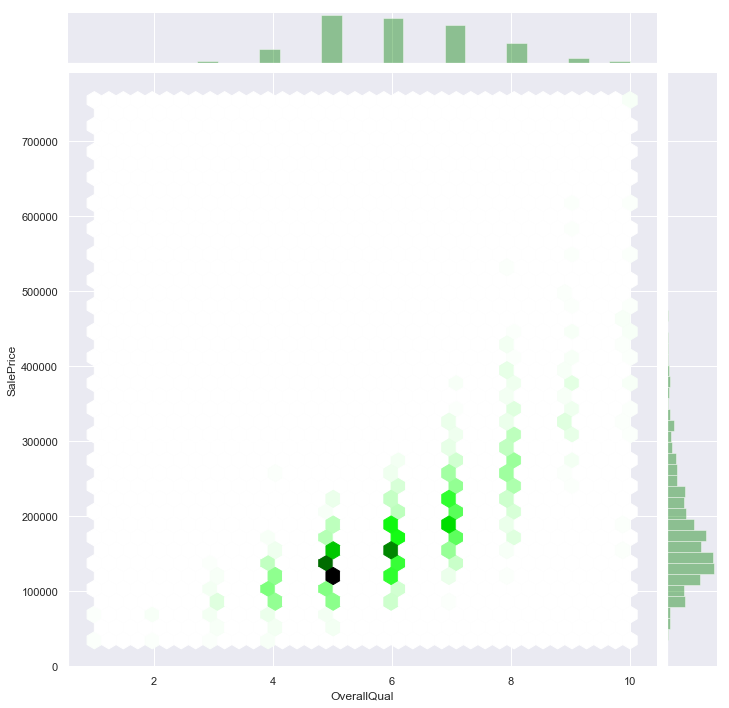

In [24]:
# Use seaborn's jointplot to make a hexagonal bin plot
#Set desired size and ratio and choose a color.
#columns = ['SalePrice','OverallQual','TotalBsmtSF','GrLivArea','GarageArea','FullBath','YearBuilt','YearRemodAdd']
sns.jointplot(x="OverallQual", y="SalePrice", data=house_tt[cols], size=10,ratio=10, kind='hex',color='green')
plt.show()

C:\Users\HII\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 'pandas.tools.plotting.radviz' is deprecated, import 'pandas.plotting.radviz' instead.
  


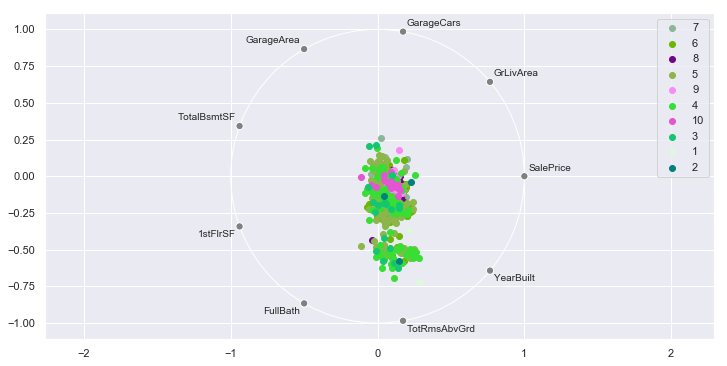

In [25]:
from pandas.tools.plotting import radviz
radviz(house_tt[cols], "OverallQual")

In [26]:
cols

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt'],
      dtype='object')

In [27]:
print("Find most important features relative to target")
corr = house_tt.corr()
corr.sort_values(["SalePrice"], ascending = False, inplace = True)
print(corr.SalePrice)

Find most important features relative to target
SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   

Correlation analysis

1)OverallQual', 'GrLivArea' and 'TotalBsmtSF' are strongly correlated with 'SalePrice'. Check!

2)'GarageCars' and 'GarageArea' are also some of the most strongly correlated variables. 
However, as we discussed in the last sub-point, the number of cars that fit into the garage is a consequence of the garage area. 'GarageCars' and 'GarageArea' are like twin brothers. You'll never be able to distinguish them. Therefore, we just need one of these variables in our analysis (we can keep 'GarageCars' since its correlation with 'SalePrice' is higher).

3)'TotalBsmtSF' and '1stFloor' also seem to be twin brothers.
We can keep 'TotalBsmtSF' just to say that our first guess was right (re-read 'So... What can we expect?').

4)'FullBath'?? Really?

5)'TotRmsAbvGrd' and 'GrLivArea', twin brothers again. Is this dataset from Chernobyl?

6)'YearBuilt'... It seems that 'YearBuilt' is slightly correlated with 'SalePrice'. Honestly, it scares me to think about 'YearBuilt' because I start feeling that we should do a little bit of time-series analysis to get this right. I'll leave this as a homework for you.

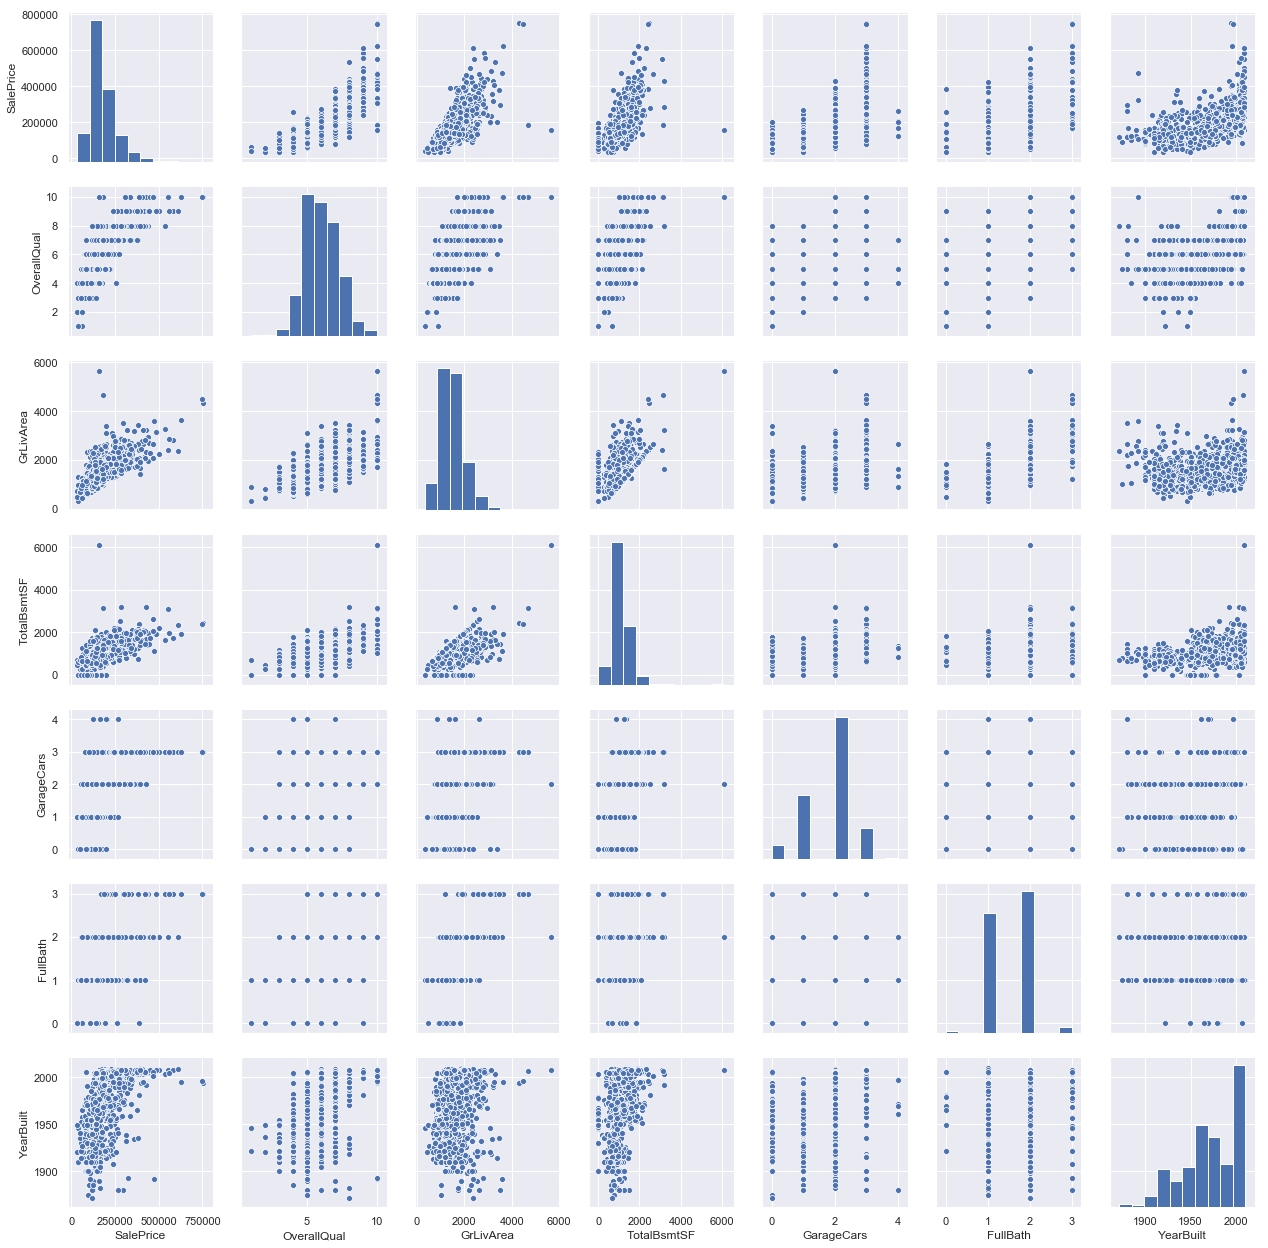

In [28]:
new=['SalePrice','OverallQual','GrLivArea','TotalBsmtSF','GarageCars','FullBath', 'YearBuilt']
sns.pairplot(house_tt[new])
plt.show()

# Finding the missing data count

In [29]:
# Finding the missing data count 
total = house_tt.isnull().sum().sort_values(ascending=False)
percent = (house_tt.isnull().sum()/house_tt.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)


,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


In [30]:
# missing value treatment
house_tt = house_tt.drop((missing_data[missing_data['Total'] > 1]).index,1)
house_tt = house_tt.drop(house_tt.loc[house_tt['Electrical'].isnull()].index)
house_tt.isnull().sum().max() #just checking that there's no missing data missing.

0

In [31]:
house_tt.isnull().sum().sort_values(ascending=False).head(20)


SalePrice       0
OverallQual     0
BsmtUnfSF       0
BsmtFinSF2      0
BsmtFinSF1      0
Foundation      0
ExterCond       0
ExterQual       0
Exterior2nd     0
Exterior1st     0
RoofMatl        0
RoofStyle       0
YearRemodAdd    0
YearBuilt       0
OverallCond     0
HouseStyle      0
Heating         0
BldgType        0
Condition2      0
Condition1      0
dtype: int64

# histogram and normal probability plot

# Outlier Detection

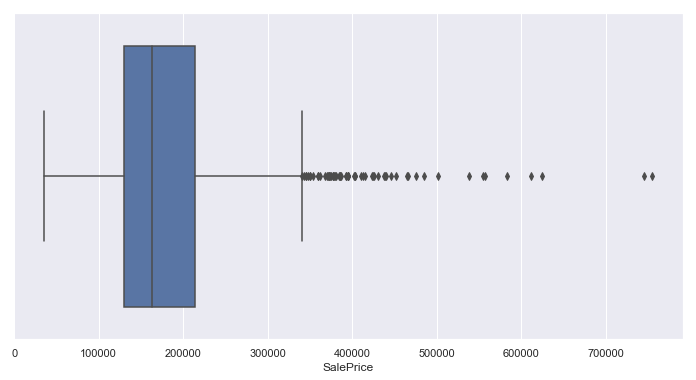

In [32]:
sns.boxplot(house_tt['SalePrice'])
plt.show()

In [33]:
saleprice_scaled = StandardScaler().fit_transform(house_tt['SalePrice'][:,np.newaxis]);
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range= saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-1.83820775]
 [-1.83303414]
 [-1.80044422]
 [-1.78282123]
 [-1.77400974]
 [-1.62295562]
 [-1.6166617 ]
 [-1.58519209]
 [-1.58519209]
 [-1.57269236]]

outer range (high) of the distribution:
[[3.82758058]
 [4.0395221 ]
 [4.49473628]
 [4.70872962]
 [4.728631  ]
 [5.06034585]
 [5.42191907]
 [5.58987866]
 [7.10041987]
 [7.22629831]]


C:\Users\HII\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\HII\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


# Bivariate Analysis

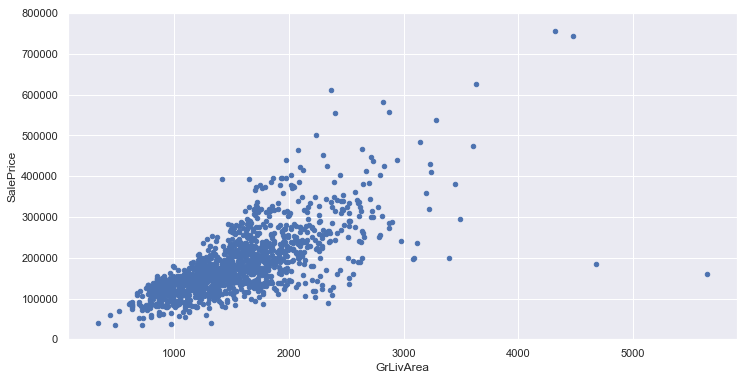

In [34]:
#bivariate analysis saleprice/grlivarea
var = 'GrLivArea'
data = pd.concat([house_tt['SalePrice'], house_tt[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

In [35]:
#deleting points that are outliers
house_tt.sort_values(by = 'GrLivArea', ascending = False)[:4]


,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1298,1299,60,RL,63887,Pave,IR3,Bnk,AllPub,Corner,Gtl,...,0,0,0,480,0,1,2008,New,Partial,160000
523,524,60,RL,40094,Pave,IR1,Bnk,AllPub,Inside,Gtl,...,0,0,0,0,0,10,2007,New,Partial,184750
1182,1183,60,RL,15623,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,555,0,7,2007,WD,Abnorml,745000
691,692,60,RL,21535,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,1,2007,WD,Normal,755000


In [36]:
house_tt = house_tt.drop(house_tt[house_tt['Id'] == 1299].index)
house_tt = house_tt.drop(house_tt[house_tt['Id'] == 692].index)
house_tt = house_tt.drop(house_tt[house_tt['Id'] == 1183].index)
house_tt = house_tt.drop(house_tt[house_tt['Id'] == 524].index)

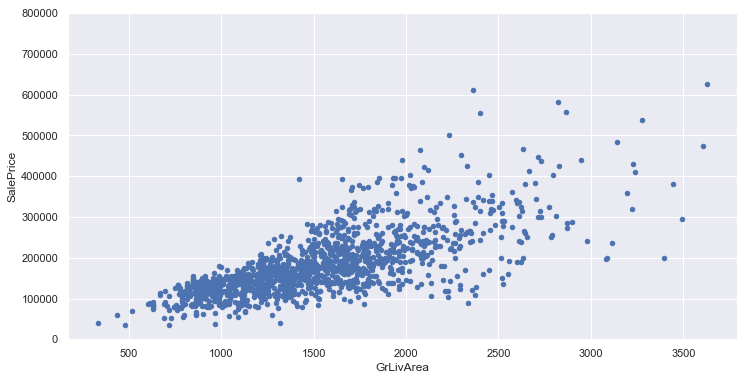

In [37]:
var = 'GrLivArea'
data = pd.concat([house_tt['SalePrice'], house_tt[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

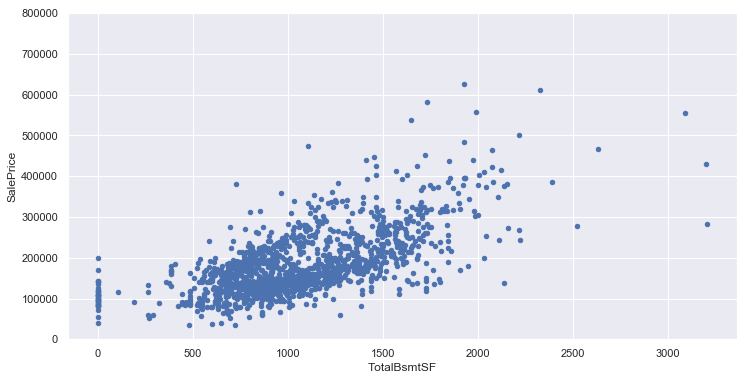

In [38]:
#bivariate analysis saleprice/grlivarea
var = 'TotalBsmtSF'
data = pd.concat([house_tt['SalePrice'], house_tt[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

In [39]:
house_tt.TotalBsmtSF.sort_values(ascending = False)[:10]

332     3206
496     3200
440     3094
1373    2633
1044    2524
224     2392
898     2330
70      2223
888     2217
178     2216
Name: TotalBsmtSF, dtype: int64

In [41]:
house_tt.columns


Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageCars', 'GarageArea',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition', 'SalePrice'],
      dtype='object')

In [42]:
#log transform skewed numeric features:
numeric_feats = house_tt.dtypes[house_tt.dtypes != "object"].index
skewed_feats = house_tt[numeric_feats].apply(lambda x: x.skew()) 
skewed_feats = skewed_feats[skewed_feats > 0.75]
skewed_feats = skewed_feats.index

house_tt[skewed_feats] = np.log1p(house_tt[skewed_feats])
house_tt.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,4.110874,RL,9.042040,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0.000000,0.0,0.0,0.0,0.0,2,2008,WD,Normal,12.247699
1,2,3.044522,RL,9.169623,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0.000000,0.0,0.0,0.0,0.0,5,2007,WD,Normal,12.109016
2,3,4.110874,RL,9.328212,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0.000000,0.0,0.0,0.0,0.0,9,2008,WD,Normal,12.317171
3,4,4.262680,RL,9.164401,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,5.609472,0.0,0.0,0.0,0.0,2,2006,WD,Abnorml,11.849405
4,5,4.110874,RL,9.565284,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0.000000,0.0,0.0,0.0,0.0,12,2008,WD,Normal,12.429220


In [43]:
house_tt.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageCars', 'GarageArea',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition', 'SalePrice'],
      dtype='object')

In [44]:
# Log transform the target for official scoring
#The key point is to to log_transform the numeric variables since most of them are skewed.
house_tt.SalePrice = np.log1p(house_tt.SalePrice)


In [45]:
df=house_tt[['OverallQual','GrLivArea','TotalBsmtSF','GarageCars','FullBath', 'YearBuilt','SalePrice']]
df=pd.get_dummies(df)
df.head()

,OverallQual,GrLivArea,TotalBsmtSF,GarageCars,FullBath,YearBuilt,SalePrice
0,7,7.444833,856,2,2,2003,2.583824
1,6,7.141245,1262,2,2,1976,2.573300
2,7,7.488294,920,2,2,2001,2.589054
3,7,7.448916,756,3,1,1915,2.553297
4,8,7.695758,1145,3,2,2000,2.597433


In [46]:
x=house_tt[['OverallQual','GrLivArea','TotalBsmtSF','GarageCars','FullBath', 'YearBuilt']]
x.columns
y=house_tt['SalePrice']
x.head()

,OverallQual,GrLivArea,TotalBsmtSF,GarageCars,FullBath,YearBuilt
0,7,7.444833,856,2,2,2003
1,6,7.141245,1262,2,2,1976
2,7,7.488294,920,2,2,2001
3,7,7.448916,756,3,1,1915
4,8,7.695758,1145,3,2,2000


In [79]:
house_ts.shape

(1459, 80)

In [47]:
x.shape

(1455, 6)

In [48]:
y.shape

(1455,)

In [49]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [50]:
x_train.shape

(1018, 6)

In [51]:
x_test.shape

(437, 6)

In [52]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import neighbors
parameter_rf= {'n_estimators':np.arange(1,50),'max_depth':np.arange(1,10)} 
# we are restricting the depth to 10 layers
model=RandomForestRegressor(random_state=0)
parameter_dt = {'max_depth':np.arange(1,10)} 
# we are restricting the depth to 10 layers
model1=DecisionTreeRegressor(random_state=0)
parameter_kn = {'n_neighbors':np.arange(1,15)} 
# we are restricting the depth to 10 layers
model2=neighbors.KNeighborsRegressor(weights='uniform',metric='euclidean')


In [53]:
GS_dt= GridSearchCV(model1,parameter_dt,cv=5) # we give the model created  above inside the GridSearch to give best number of Parameters
GS_dt.fit(x,y)
print(GS_dt.best_params_)

{'max_depth': 6}


In [54]:
GS_kn= GridSearchCV(model2,parameter_kn,cv=5) # we give the model created  above inside the GridSearch to give best number of Parameters
GS_kn.fit(x,y)
print(GS_kn.best_params_)

{'n_neighbors': 6}


In [55]:
GS_rf= GridSearchCV(model,parameter_rf,cv=5) # we give the model created  above inside the GridSearch to give best number of Parameters
GS_rf.fit(x,y)
print(GS_rf.best_params_)


{'max_depth': 8, 'n_estimators': 38}


In [60]:
DT_model=DecisionTreeRegressor(max_depth=6,random_state=0)
DT_model.fit(x_train,y_train)
pred1=DT_model.predict(x_test)
Rf_model=RandomForestRegressor(n_estimators=38,max_depth=8,random_state=0)
Rf_model.fit(x_train,y_train)
pred2=Rf_model.predict(x_test)
Lr_model=LinearRegression()
Lr_model.fit(x_train,y_train)
pred4=Lr_model.predict(x_test)
Kn_model=neighbors.KNeighborsRegressor(n_neighbors=6,weights='uniform',metric='euclidean')
Kn_model.fit(x_train,y_train)
pred5=Kn_model.predict(x_test)

RMSE Score  for Decision Tree is 0.014817 and R2 value is 0.829575 
RMSE Score  for Random Forest is 0.012633 and R2 value is 0.891295 
RMSE Score  for Logistic Regression is 0.012271 and R2 value is 0.838535 
RMSE Score  for KNN is 0.020378 and R2 value is 0.632780 


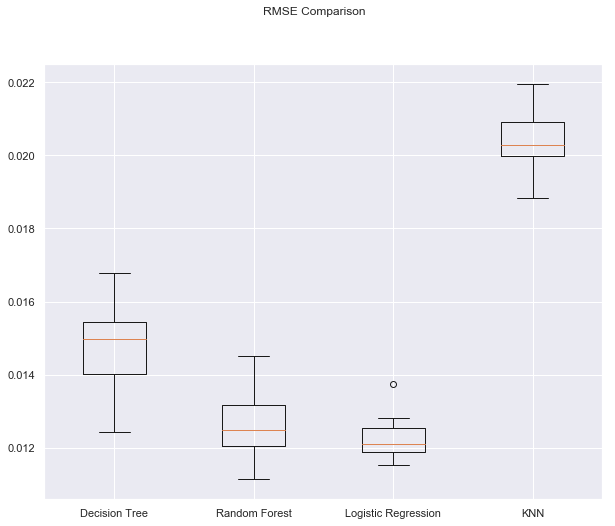

In [76]:
# kfold cross validation
mod=[]
mod.append(('Decision Tree',DT_model))
mod.append(('Random Forest',Rf_model))
#mod.append(('Naive Bayes',Nb_model))
mod.append(('Logistic Regression',Lr_model))
mod.append(('KNN',Kn_model))
result=[]
names=[]
#scoring='accuracy'
for name,model in mod:
    scores = cross_val_score(model, x, y, scoring="neg_mean_squared_error", cv=10)
    rmse_scores = np.sqrt(-scores)
    cv_results=model.score(x,y)
    result.append(rmse_scores)
    names.append(name)
    msg="RMSE Score  for %s is %f and R2 value is %f "%(name,rmse_scores.mean(),cv_results)
    print(msg)
# boxplot for the models
fig=plt.figure(figsize=[10,8])
fig.suptitle("RMSE Comparison")
ax=fig.add_subplot(111)
plt.boxplot(result)
ax.set_xticklabels(names)
plt.show()


In [78]:
new_titanic=pd.DataFrame({'Id':train,'Survived':final})
new_titanic.head()

col_0,2.515327118220693,2.520701426498822,2.5214419156409495,2.5222288832568576,2.5228720796547637,2.5233947819612594,2.523631875076381,2.524368936463036,2.524575933327944,2.5267939369367944,...,2.6203155919406664,2.6211589687292087,2.6219014540795142,2.6223121738302475,2.6231179656892096,2.6236575184899777,2.624259203332597,2.6291480007373513,2.629563514085169,2.630204545072217
SalePrice,,,,,,,,,,,,,,,,,,,,,
2.438886,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2.439907,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2.446056,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2.449194,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2.450717,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2.473089,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2.477807,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2.485083,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2.486459,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
